## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

## Read our file and check data 

In [2]:
df = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')

df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


## Check is there not available values in dataframe

In [3]:
print(df.isna().sum())


IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64


## Replace na value in PdDistrict 

In [4]:
df.loc[df['PdDistrict'].isna()]

df['PdDistrict'].fillna('None', inplace = True)

## Check if there any na values left

In [5]:
print(df.isna().sum())

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64


## Start exploring data

In [6]:
df.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


### 5 questions for this data:
###    1. 5 most commited crimes
###    2. Visualization of commited crimes by hours
###    3. Visualization of commited crimes by day of the week
###    4. Visualization of commited crimes by date
###    5. Visualization of commited crimes by map of Sanfrancisco

In [7]:
df['Category'].unique()

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [8]:
df[df['Category'] ==  'WEAPON LAWS'].count()

IncidntNum    1658
Category      1658
Descript      1658
DayOfWeek     1658
Date          1658
Time          1658
PdDistrict    1658
Resolution    1658
Address       1658
X             1658
Y             1658
Location      1658
PdId          1658
dtype: int64

In [9]:
"""
['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'] 
['ЗАКОНЫ ОБ ОРУЖИИ', 'ГАРАНТИИ', 'НЕУГОЛОВНЫЕ', 'НАПАДЕНИЕ',
        «ДРУГИЕ ПРАВОНАРУШЕНИЯ», «ПРОИСХОДЯЩЕЕ ЛИЦО», «ЛАРСЕНА / КРАЖА», «КРАЖА»,
        «Украденное имущество», «Ограбление», «МОШЕННИЧЕСТВО», «НАРКОТИК / НАРКОТИК»,
        «КРАЖА АВТОМОБИЛЯ», «ПОДТВЕРЖДЕННЫЙ АВТОМОБИЛЬ», «ВАНДАЛИЗМ», «ПОДЖИГ»,
        «ПРОСТИТУЦИЯ», «ВТОРИЧНЫЕ КОДЕКСЫ», «ПОДОЗРИТЕЛЬНЫЙ ОКР», «ПЬЯТНОСТЬ»,
        «ТРЕСПАСС», «СЕКСУАЛЬНЫЕ НАРУШЕНИЯ, НЕ НАСИЛЬСТВЕННЫЕ», «СЕКСУАЛЬНЫЕ НАРУШЕНИЯ, ПРИНУДИТЕЛЬНЫЕ»
        «УБЕГ», «ПОХИЩЕНИЕ», «НЕПРАВИЛЬНОЕ ПОВЕДЕНИЕ»,
        «ВОЖДЕНИЕ ПОД ВЛИЯНИЕМ», «ПОДДЕЛКА / ПОДДЕЛКА»,
        «ПРИСОЕДИНЕНИЕ», «ВЗЯТОЧНИК», «СЕМЕЙНЫЕ ПРЕСТУПЛЕНИЯ», «ИГРЫ»,
        «САМОУБИЙСТВО», «ЗАКОНЫ О ЛИКАХ», «ВЫВОД», «ЛАЙТЕРИНГ», «ТЕРРИТОРИЯ»,
        'BAD ПРОВЕРКИ', 'ПОРНОГРАФИИ / OBSCENE MAT']
        """

"\n['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',\n       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',\n       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',\n       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',\n       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',\n       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',\n       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',\n       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',\n       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',\n       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',\n       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'] \n['ЗАКОНЫ ОБ ОРУЖИИ', 'ГАРАНТИИ', 'НЕУГОЛОВНЫЕ', 'НАПАДЕНИЕ',\n        «ДРУГИЕ ПРАВОНАРУШЕНИЯ», «ПРОИСХОДЯЩЕЕ ЛИЦО», «ЛАРСЕНА / КРАЖА», «КРАЖА»,\n        «Украденное имущество», «Ограбление», «МОШЕННИЧЕСТВО», «НАРКОТИК / НАРКОТИК»,\n        «КРАЖА АВТОМОБИЛЯ», «ПОДТВЕРЖДЕННЫЙ АВТО

### We will work with copy of our orignial dataset.

In [10]:
df_copy = df.copy()

df_copy.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
# Take 5 most commited crimes
criminals = df_copy.groupby(by="Category").count()

criminals.sort_values('IncidntNum', ascending = False, inplace=True)

names = [i for i in criminals.index[:5]]

vals = [i for i in criminals['IncidntNum'][:5]]

print(names, vals)

['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT', 'VANDALISM'] [40409, 19599, 17866, 13577, 8589]


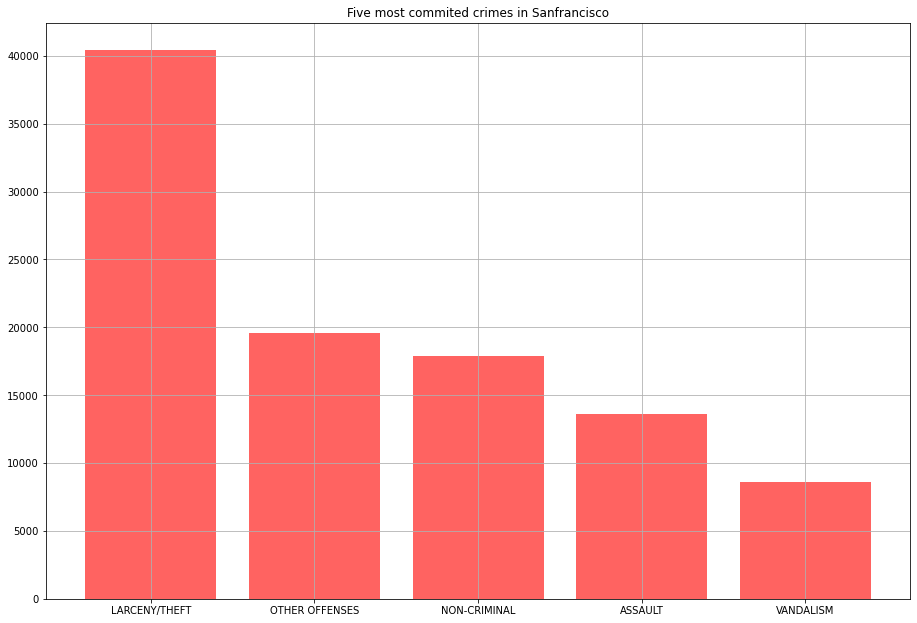

In [12]:
# Make basic bar plot
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])

plt.title('Five most commited crimes in Sanfrancisco')

ax.bar(names, vals, color='#ff6361')
ax.grid()
plt.show()

plt.close()

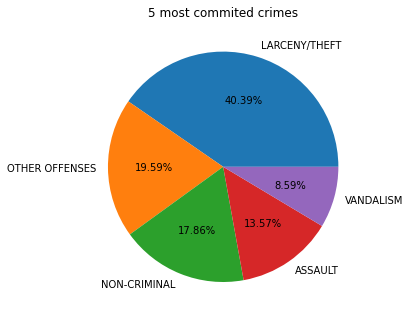

In [13]:
# Make basic pie chart with 5 most commited crimes
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

plt.title('5 most commited crimes')

ax.pie(vals, labels = names, autopct='%1.2f%%')

plt.show()

plt.close()



In [14]:
# I want to take all picture at once, so I will add one more value that will contain sum of all other values 
# that are not in this 5 crime type
names.append('Others')

oths = sum([i for i in criminals['IncidntNum'][5:]])

vals.append(oths)

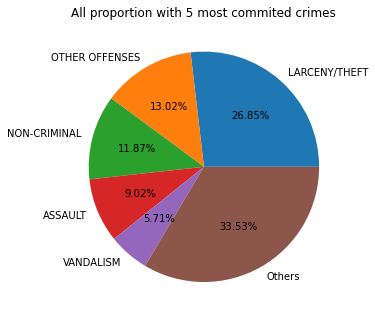

In [15]:

# Let's look to general pie chart

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.set_title('All proportion with 5 most commited crimes')

ax.pie(vals, labels = names, autopct='%1.2f%%')

plt.show()

plt.close()

### Visualization of commited crimes by hours

In [16]:
# Simple scatter plot
 
# For this purpose, we will use column 'Time' and list with range of 1 to 24

hours = [i for i in range(0,24)]
hours

# Let's check time column

df_copy['Time'][0]

# Let's check if we can scatter data with initial type

# As I tested, it doesn't compiled

# I created hour column getting only hour from Time column.

df_copy['Hour'] = df_copy['Time'].apply(lambda x: int(x.split(':')[0]) )

df_copy.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120,11
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168,11
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010,14
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000,23
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000,0


In [17]:
# now we need to group values by hour and count crimes

hourly = df_copy.groupby('Hour').count()

hourly = hourly['IncidntNum']


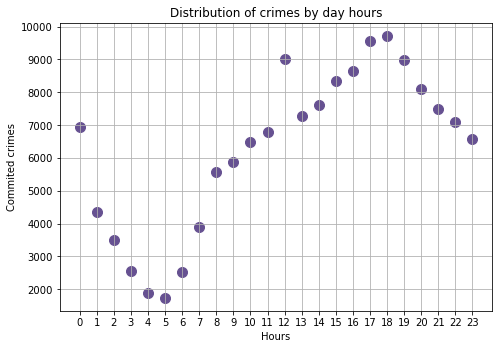

In [18]:
# Let's check our scatter plot
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])


ax.set_title('Distribution of crimes by day hours')

ax.set_xticks(hours)

ax.scatter(hours, hourly, c='#665191', s=100)

ax.set_ylabel('Commited crimes')
ax.set_xlabel('Hours')

ax.grid()

plt.show()

plt.close()

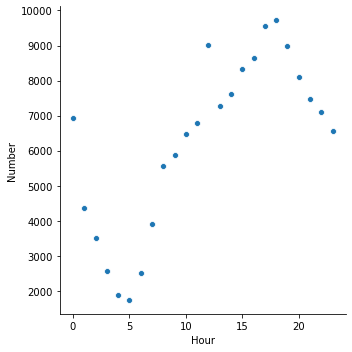

In [19]:
# Ok, we see it on matplotlib and let's check seaborn's visualization

# for this purpose, i will create pandas dataframe containing all hours from df_copy and hours list
rel_data = pd.DataFrame({'Hour':hours, 'Number':hourly.values}) 

sns.relplot('Hour', 'Number', data=rel_data)

plt.show()

plt.close()

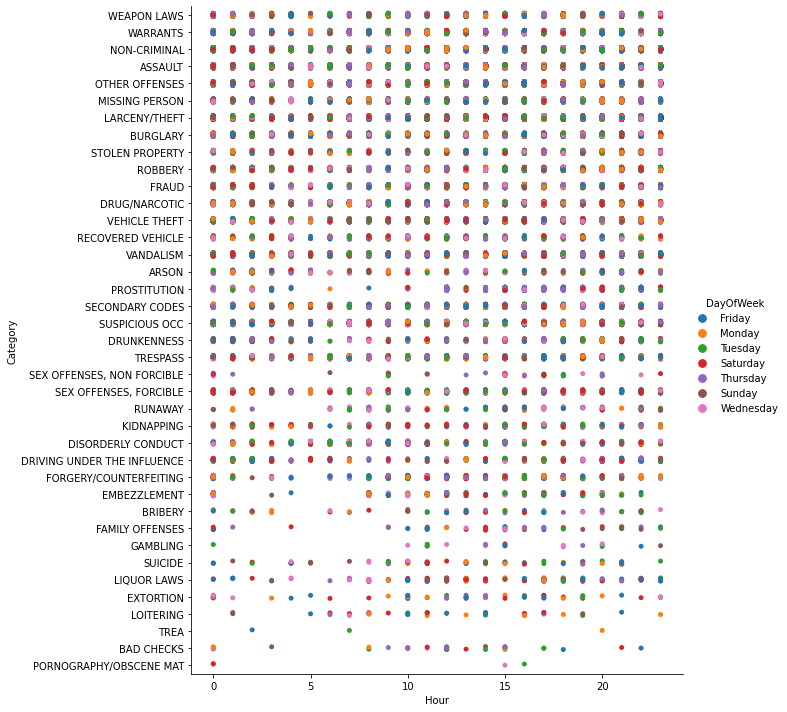

In [20]:
# What we can do in seaborn, is to see relations between categorical data

sns.catplot('Hour', 'Category', hue='DayOfWeek', data=df_copy, height=10)

In [21]:
# Let's see categories of crimes commited by hours

# Here we will observe crimes like Weapon laws, Sex offences-forcible, Vandalism, Prostitution and Drug-Narcotic

# Let's group dataframe by Category and hours

cat_hour = df_copy.groupby(['Category', 'Hour']).size().reset_index(name='Count')

categories = ['WEAPON LAWS', 'SEX OFFENSES, FORCIBLE', 'VANDALISM', 'PROSTITUTION', 'DRUG/NARCOTIC']

cat_hour = cat_hour[ cat_hour['Category'].isin(categories) ]

cat_hour

,Category,Hour,Count
155,DRUG/NARCOTIC,0,131
156,DRUG/NARCOTIC,1,72
157,DRUG/NARCOTIC,2,78
158,DRUG/NARCOTIC,3,62
159,DRUG/NARCOTIC,4,44
...,...,...,...
821,WEAPON LAWS,19,101
822,WEAPON LAWS,20,75
823,WEAPON LAWS,21,92
824,WEAPON LAWS,22,83


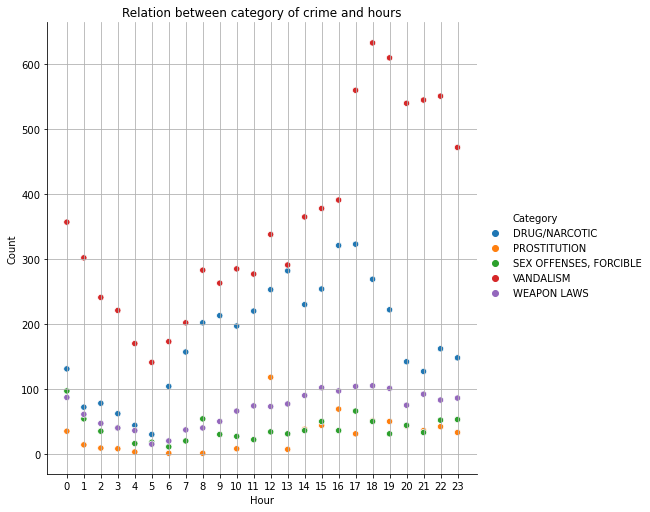

In [22]:
# Now, let's relation between these 3 columns

cat_hour_rel = sns.relplot('Hour', 'Count', hue='Category', data=cat_hour, height=7, s=40)

plt.title('Relation between category of crime and hours')

plt.xticks(hours)

plt.grid()

plt.show()


plt.close()

### By day of the week

In [23]:
daily = df_copy.groupby('DayOfWeek').count()

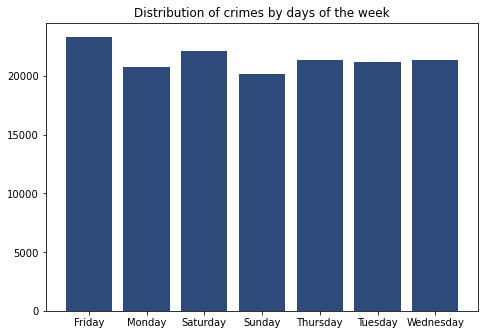

In [24]:
fig = plt.figure()

ax = fig.add_axes([0, 0, 1, 1])

ax.set_title('Distribution of crimes by days of the week')

ax.bar(daily.index, daily['IncidntNum'], color='#2f4b7c')


plt.show()

plt.close()

In [25]:
# Let's make visualization more complex

# Based on 5 categories, we will look at their distribution by week-days

daily_cat = df_copy.groupby(['Category', 'DayOfWeek']).size().reset_index(name='Crimes')

daily_cat = daily_cat[daily_cat['Category'].isin(categories)]

daily_cat.head(5)

,Category,DayOfWeek,Crimes
49,DRUG/NARCOTIC,Friday,548
50,DRUG/NARCOTIC,Monday,608
51,DRUG/NARCOTIC,Saturday,558
52,DRUG/NARCOTIC,Sunday,551
53,DRUG/NARCOTIC,Thursday,644


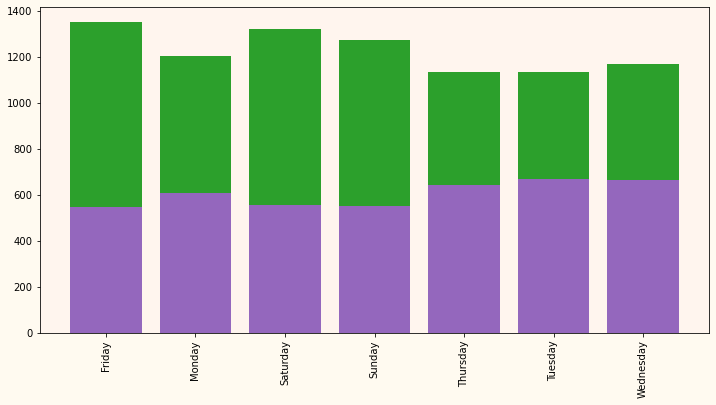

In [26]:
# First let's create figure

fig, ax = plt.subplots()

day_of_week = daily_cat['DayOfWeek'].unique()

for i in range(len(categories)):
    cat = daily_cat[daily_cat['Category'] == categories[i]]['Crimes']
    ax.bar(day_of_week, cat)


ax.set_xticks(day_of_week)

plt.xticks(fontsize=10, rotation=90)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

plt.close()

In [27]:
#As we see, I can not clearly done it, so I find another way to solve the problem

# We need to specify values of each of categories and then, use bottom parameter in bar function

drug = daily_cat[daily_cat['Category'] == 'DRUG/NARCOTIC']['Crimes'].values
pros = daily_cat[daily_cat['Category'] == 'PROSTITUTION']['Crimes'].values
sexof = daily_cat[daily_cat['Category'] == 'SEX OFFENSES, FORCIBLE']['Crimes'].values
vand =  daily_cat[daily_cat['Category'] == 'VANDALISM']['Crimes'].values
wep = daily_cat[daily_cat['Category'] == 'WEAPON LAWS']['Crimes'].values

# let's quickly check our variables
wep

array([271, 223, 200, 246, 227, 222, 269], dtype=int64)

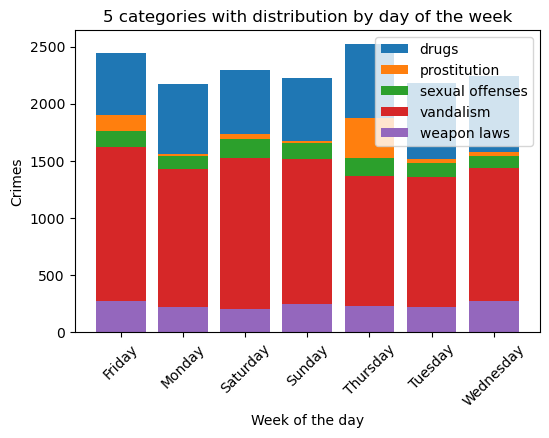

In [28]:
# next we creeate variable ind that will represent day of weeks numeric

ind = [x for x, _ in enumerate(day_of_week)]


# Now let's create bar
plt.figure(figsize=(6, 4), dpi=100)

plt.bar(ind, drug, label='drugs', width=0.8, bottom = pros + sexof + vand + wep)
plt.bar(ind, pros, label='prostitution', width=0.8, bottom = sexof + vand + wep)
plt.bar(ind, sexof, label='sexual offenses', width=0.8, bottom = vand + wep)
plt.bar(ind, vand, label='vandalism', width=0.8, bottom = wep)
plt.bar(ind, wep, label='weapon laws', width=0.8)

plt.xticks(ind, day_of_week, fontsize=10, rotation=45)

plt.legend()

plt.ylabel('Crimes')
plt.xlabel('Week of the day')



plt.title('5 categories with distribution by day of the week')

plt.show()

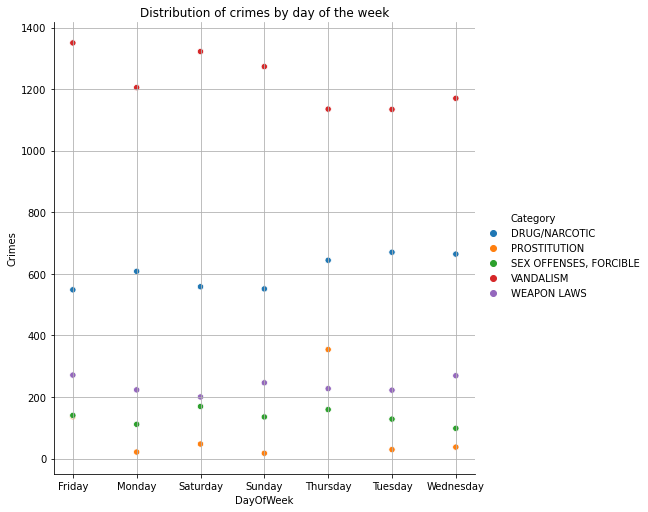

In [29]:
# also, we can check relational plot between these 3 columns

sns.relplot('DayOfWeek', 'Crimes', hue='Category', data=daily_cat, height=7, s=40)

plt.title('Distribution of crimes by day of the week')

plt.grid()

plt.show()

plt.close()

# 4. Visualization of commited crimes by date

In [30]:
# First, I want to create month column in df_copy

# For this purposes, need to split Date column

df_copy['Month'] = df_copy['Date'].apply(lambda x: int(x.split('/')[0]))

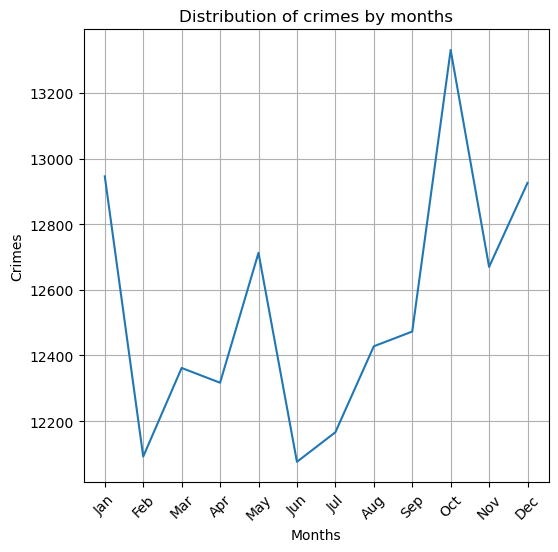

In [31]:
# after this we need to group elements by month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly = df_copy.groupby('Month').count()

# Let's make simple plot just to see results visualized

plt.figure(figsize=(6,6), dpi=100)

plt.plot(monthly.index, monthly['IncidntNum'])

plt.title('Distribution of crimes by months')

plt.ylabel('Crimes')
plt.xlabel('Months')

plt.xticks(monthly.index, months, rotation=45)
plt.grid()
plt.show()

plt.close()

In [32]:
# Now let's look at the most commited crimes at each month

# For this purpose, need to group df by month and crime

mon_cat = df_copy.groupby(['Month', 'Category']).size().reset_index(name='Crimes')

mon_cat.head(5)

,Month,Category,Crimes
0,1,ARSON,25
1,1,ASSAULT,1138
2,1,BAD CHECKS,6
3,1,BRIBERY,4
4,1,BURGLARY,523


In [33]:
# After grouping elements let's check five most commited crimes in each of the month

# Checking if we can sort values by multiple columns

mon_cat.sort_values(by = ['Month', 'Crimes'], ascending = [True, False], inplace=True)

# As i checked five most commited crime in each months its same as five most commited crimes overall

# So, i will work with crimes from 5th to 10th most commited crimes in each month

In [34]:
five = pd.DataFrame(columns=['Month', 'Category', 'Crimes'])

mon_cat[mon_cat['Month'] == 5][5:10]

win = [12, 1, 2]
spr = [3, 4, 5]
summer = [6, 7, 8]
fall = [9, 10, 11]
season = [win, spr, summer, fall]
season_names = ['Winter', 'Spring', 'Summer', 'Autumn']

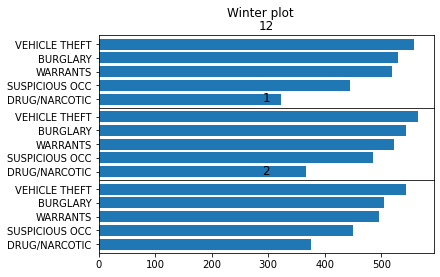

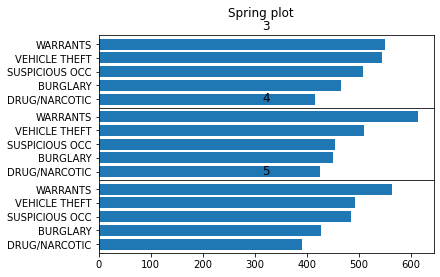

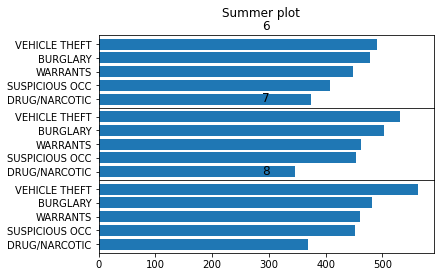

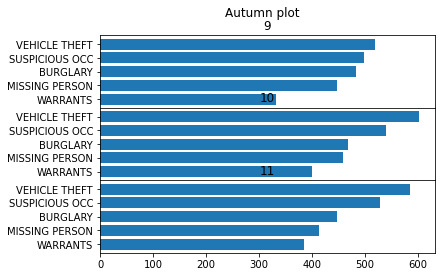

In [35]:
# I decided to break months data into year periods (summer, winter and e.t.c.)

# Season data
for ses in range(len(season)):
    fig, axs = plt.subplots(3, sharex=True, sharey=True, gridspec_kw={'hspace': 0}) 

    fig.suptitle(f'{season_names[ses]} ' + 'plot')
    
    for i in range(len(win)):
    
        names = mon_cat[mon_cat['Month'] == season[ses][i]][5:10]['Category']
        y_pos = np.arange(len(names))
        x_pos = mon_cat[mon_cat['Month'] == season[ses][i]][5:10]['Crimes']
        
        axs[i].barh(y_pos, x_pos, align='center')
        
        axs[i].set_yticks(y_pos)
        
        axs[i].set_yticklabels(names)
        
        axs[i].set_title(season[ses][i])
        
        axs[i].invert_yaxis()
    


# 5. Visualization of commited crimes by map of Sanfrancisco

In [36]:
import plotly.figure_factory as ff

In [37]:
# So here is basic plot of crimes 

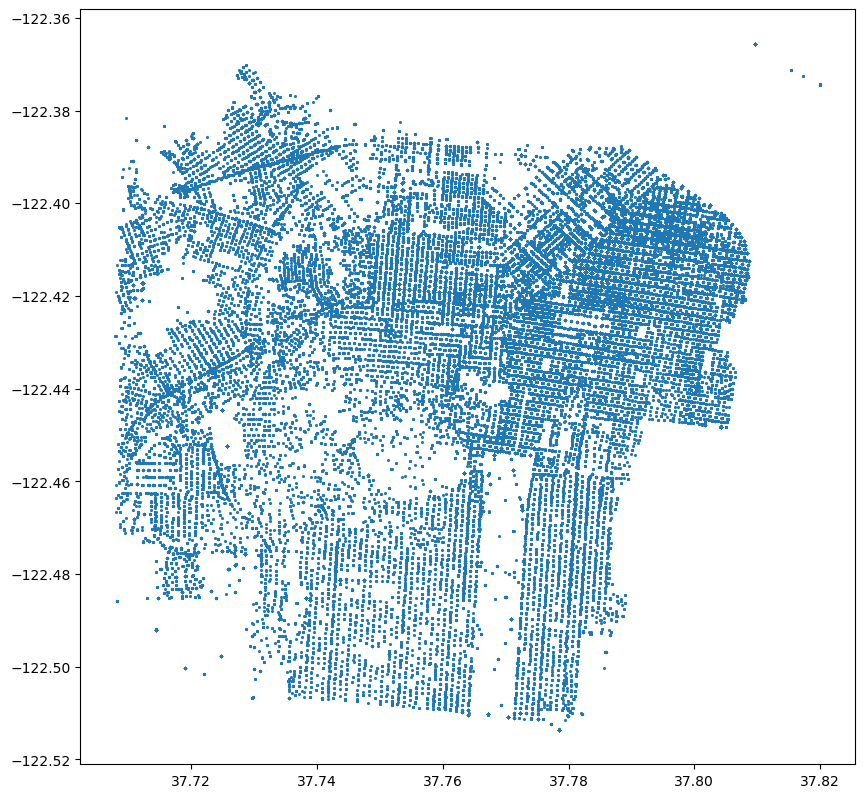

In [38]:
plt.figure(figsize=(10, 10), dpi  = 100)

plt.scatter(df_copy['Y'], df_copy['X'], s=1.5)

plt.show()

plt.close()

In [39]:
# As we noticed, dots are already draw map of San-Francisco without any images or maps itself.

In [40]:
# First I'll drop Location column

df_copy.drop('Location', axis='columns', inplace=True)

In [41]:
# Next I want to apply Points on every rows Y(longitude) and X(Latitude)

points = df_copy.apply(lambda row: Point(row.Y, row.X), axis=1)
points.head()

0     POINT (37.775420706711 -122.403404791479)
1     POINT (37.775420706711 -122.403404791479)
2    POINT (37.7299809672996 -122.388856204292)
3    POINT (37.7857883766888 -122.412970537591)
4    POINT (37.7650501214668 -122.419671780296)
dtype: object

In [42]:
# Next, For working properly in geopndas, geo dataframe will be created based on df_copy and points

geo_crimes = gpd.GeoDataFrame(df_copy, geometry=points)

# Next step is to make machine know and process geometry columns as longitute and latitude

geo_crimes.crs = 'epsg:3857'

geo_crimes.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,PdId,Hour,Month,geometry
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,12005827212120,11,1,POINT (37.775 -122.403)
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,12005827212168,11,1,POINT (37.775 -122.403)
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,14105926363010,14,4,POINT (37.730 -122.389)
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,16001366271000,23,1,POINT (37.786 -122.413)
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,16000274071000,0,1,POINT (37.765 -122.420)


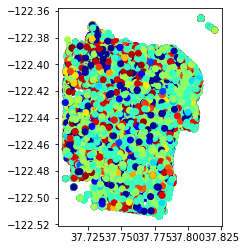

In [43]:
geo_crimes.plot(cmap='jet', column='Category')

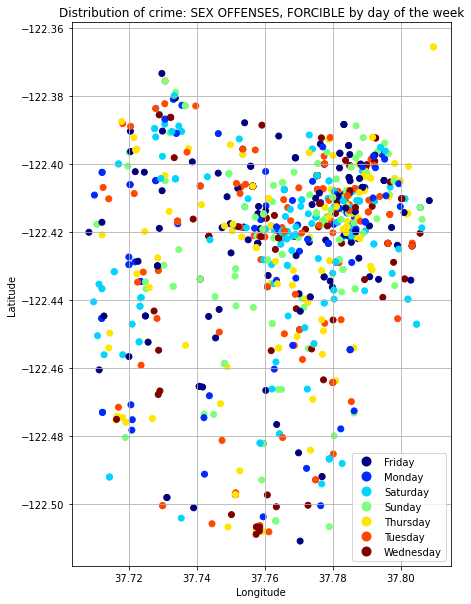

In [44]:
# Here we can see plot of DRUG/Narcotic crime type among the city.
geo_crimes[geo_crimes['Category'] == 'SEX OFFENSES, FORCIBLE'].plot(figsize=(10,10), column='DayOfWeek', cmap='jet', legend=True)

# Column : Address means we divide crimes to colors based on address
plt.grid()

plt.title('Distribution of crime: SEX OFFENSES, FORCIBLE by day of the week')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.show()

plt.close()

## Now let's use machine learning on this dataset

In [45]:
df_copy.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,PdId,Hour,Month,geometry
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,12005827212120,11,1,POINT (37.775 -122.403)
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,12005827212168,11,1,POINT (37.775 -122.403)
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,14105926363010,14,4,POINT (37.730 -122.389)
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,16001366271000,23,1,POINT (37.786 -122.413)
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,16000274071000,0,1,POINT (37.765 -122.420)


In [46]:
# Check correlation

df_copy.apply(lambda x: x.factorize()[0]).corr()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,PdId,Hour,Month,geometry
IncidntNum,1.000000,-0.019631,-0.057334,-0.010772,0.339436,-0.077290,0.017922,0.097194,0.209077,0.219245,0.219245,0.941184,0.002322,0.190232,0.219245
Category,-0.019631,1.000000,0.184189,0.002555,0.006157,-0.014697,-0.004045,0.054469,0.023614,0.040678,0.040678,-0.017832,0.011831,0.005325,0.040678
Descript,-0.057334,0.184189,1.000000,-0.001220,-0.001632,0.032301,0.002517,-0.015975,-0.023699,0.003071,0.003071,-0.042509,-0.008769,-0.003796,0.003071
DayOfWeek,-0.010772,0.002555,-0.001220,1.000000,-0.029889,0.011275,-0.004340,-0.016225,-0.006563,-0.010645,-0.010645,-0.009401,0.004941,0.024001,-0.010645
Date,0.339436,0.006157,-0.001632,-0.029889,1.000000,0.017577,-0.005115,0.001565,0.075955,0.084881,0.084881,0.325885,0.002569,0.387691,0.084881
Time,-0.077290,-0.014697,0.032301,0.011275,0.017577,1.000000,-0.070673,-0.173653,-0.046274,-0.052669,-0.052669,-0.064583,0.019403,0.010485,-0.052669
PdDistrict,0.017922,-0.004045,0.002517,-0.004340,-0.005115,-0.070673,1.000000,0.058409,0.216705,0.219949,0.219949,0.012844,-0.002563,-0.010437,0.219949
Resolution,0.097194,0.054469,-0.015975,-0.016225,0.001565,-0.173653,0.058409,1.000000,0.049386,0.063441,0.063441,0.071512,-0.005705,0.005552,0.063441
Address,0.209077,0.023614,-0.023699,-0.006563,0.075955,-0.046274,0.216705,0.049386,1.000000,0.771468,0.771468,0.191533,0.009595,0.045581,0.771468
X,0.219245,0.040678,0.003071,-0.010645,0.084881,-0.052669,0.219949,0.063441,0.771468,1.000000,1.000000,0.201623,0.003224,0.055129,1.000000


### Hint: I messed up things so here we do not have Month and Hour columns, If there any of these columns, please remove

In [47]:
# As we see here there are lot of columns that are usefult for analys but not very necessary for predicting model
# Let's drop them

df_copy.drop(['IncidntNum', 'Address' ,'PdId', 'Time'], axis='columns', inplace=True)

In [48]:
# Once again let's check correlation

df_copy[1:2000].apply(lambda x: x.factorize()[0]).corr()

,Category,Descript,DayOfWeek,Date,PdDistrict,Resolution,X,Y,Hour,Month,geometry
Category,1.000000,0.177630,0.021051,-0.019537,0.015317,0.084036,0.010842,0.010842,0.014893,-0.045983,0.010842
Descript,0.177630,1.000000,0.001831,0.092239,0.020335,-0.035386,0.128324,0.128324,-0.022073,0.016315,0.128324
DayOfWeek,0.021051,0.001831,1.000000,0.197235,0.041998,-0.016221,-0.025531,-0.025531,0.026375,0.022056,-0.025531
Date,-0.019537,0.092239,0.197235,1.000000,0.017601,0.008973,0.481010,0.481010,-0.002977,0.430174,0.481010
PdDistrict,0.015317,0.020335,0.041998,0.017601,1.000000,0.044834,0.131426,0.131426,-0.012135,-0.033633,0.131426
Resolution,0.084036,-0.035386,-0.016221,0.008973,0.044834,1.000000,0.065482,0.065482,0.006665,0.004970,0.065482
X,0.010842,0.128324,-0.025531,0.481010,0.131426,0.065482,1.000000,1.000000,-0.024943,0.183179,1.000000
Y,0.010842,0.128324,-0.025531,0.481010,0.131426,0.065482,1.000000,1.000000,-0.024943,0.183179,1.000000
Hour,0.014893,-0.022073,0.026375,-0.002977,-0.012135,0.006665,-0.024943,-0.024943,1.000000,0.022387,-0.024943
Month,-0.045983,0.016315,0.022056,0.430174,-0.033633,0.004970,0.183179,0.183179,0.022387,1.000000,0.183179


In [49]:
# I need to numeralize categorical data

# For this purposes, I want to see unique values for all columns

for col_name in df_copy.columns:
    if df_copy[col_name].dtypes == 'object':
        unique_cat = len(df_copy[col_name].unique())
        print(f"{col_name} has {unique_cat} unique values")

Category has 39 unique values
Descript has 726 unique values
DayOfWeek has 7 unique values
Date has 366 unique values
PdDistrict has 11 unique values
Resolution has 14 unique values


In [50]:
# Also, we have here data from only 1 year, so I will divide date column to days of month and months so it will be more numerialisable

df_copy['Day'] = df_copy['Date'].apply(lambda x: int(x.split('/')[1]))

# And let's remove Date column

df_copy.drop('Date', axis='columns', inplace=True)

In [51]:
df_copy[1:2000].apply(lambda x: x.factorize()[0]).corr()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Month,geometry,Day
Category,1.000000,0.177630,0.021051,0.015317,0.084036,0.010842,0.010842,0.014893,-0.045983,0.010842,0.062229
Descript,0.177630,1.000000,0.001831,0.020335,-0.035386,0.128324,0.128324,-0.022073,0.016315,0.128324,0.027646
DayOfWeek,0.021051,0.001831,1.000000,0.041998,-0.016221,-0.025531,-0.025531,0.026375,0.022056,-0.025531,0.373609
PdDistrict,0.015317,0.020335,0.041998,1.000000,0.044834,0.131426,0.131426,-0.012135,-0.033633,0.131426,0.079130
Resolution,0.084036,-0.035386,-0.016221,0.044834,1.000000,0.065482,0.065482,0.006665,0.004970,0.065482,0.020726
X,0.010842,0.128324,-0.025531,0.131426,0.065482,1.000000,1.000000,-0.024943,0.183179,1.000000,0.063182
Y,0.010842,0.128324,-0.025531,0.131426,0.065482,1.000000,1.000000,-0.024943,0.183179,1.000000,0.063182
Hour,0.014893,-0.022073,0.026375,-0.012135,0.006665,-0.024943,-0.024943,1.000000,0.022387,-0.024943,-0.008194
Month,-0.045983,0.016315,0.022056,-0.033633,0.004970,0.183179,0.183179,0.022387,1.000000,0.183179,-0.099407
geometry,0.010842,0.128324,-0.025531,0.131426,0.065482,1.000000,1.000000,-0.024943,0.183179,1.000000,0.063182


In [52]:
# I do not need geometry column also

df_copy.drop('geometry', axis='columns', inplace=True)

In [53]:
df_copy.head(5)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Month,Day
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421,11,1,29
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421,11,1,29
2,WARRANTS,WARRANT ARREST,Monday,BAYVIEW,"ARREST, BOOKED",-122.388856,37.729981,14,4,25
3,NON-CRIMINAL,LOST PROPERTY,Tuesday,TENDERLOIN,NONE,-122.412971,37.785788,23,1,5
4,NON-CRIMINAL,LOST PROPERTY,Friday,MISSION,NONE,-122.419672,37.765050,0,1,1


In [54]:
descript = df_copy['Descript'].value_counts().sort_values(ascending=False)

descript[:5]

GRAND THEFT FROM LOCKED AUTO     17741
LOST PROPERTY                     4596
AIDED CASE, MENTAL DISTURBED      4566
PETTY THEFT OF PROPERTY           4416
MALICIOUS MISCHIEF, VANDALISM     4262
Name: Descript, dtype: int64

In [55]:
# Next column we change is DayOfWeek (Convert Monday,Tue to 1,2,3 e.t.c.)
def day_to_num(day):
    if day == 'Monday': return 1
    elif day == 'Tuesday': return 2
    elif day == 'Wednesday': return 3
    elif day == 'Thursday': return 4
    elif day == 'Friday': return 5
    elif day == 'Saturday': return 6
    else: return 7
    
df_copy['DayOfWeek'] = df_copy['DayOfWeek'].apply(lambda x: day_to_num(x))


df_copy.head(5)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Month,Day
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,5,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421,11,1,29
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",5,SOUTHERN,"ARREST, BOOKED",-122.403405,37.775421,11,1,29
2,WARRANTS,WARRANT ARREST,1,BAYVIEW,"ARREST, BOOKED",-122.388856,37.729981,14,4,25
3,NON-CRIMINAL,LOST PROPERTY,2,TENDERLOIN,NONE,-122.412971,37.785788,23,1,5
4,NON-CRIMINAL,LOST PROPERTY,5,MISSION,NONE,-122.419672,37.765050,0,1,1


In [56]:
# Check uniques and correlation again

for col_name in df_copy.columns:
    if df_copy[col_name].dtypes == 'object':
        unique_cat = len(df_copy[col_name].unique())
        print(f"{col_name} has {unique_cat} unique values")

Category has 39 unique values
Descript has 726 unique values
PdDistrict has 11 unique values
Resolution has 14 unique values


### Try to numeralize description column

In [57]:
# I want to predict resolution of crime by other factors

# Let's check length of description to every resolution

df_copy['Character_cnt'] = df_copy['Descript'].str.len()

df_copy.groupby('Resolution')['Character_cnt'].mean()

# As we see, there is big range between length of description of different resolution

Resolution
ARREST, BOOKED                            27.511823
ARREST, CITED                             32.486111
CLEARED-CONTACT JUVENILE FOR MORE INFO    17.189655
COMPLAINANT REFUSES TO PROSECUTE          15.000000
EXCEPTIONAL CLEARANCE                     22.609164
JUVENILE BOOKED                           23.995265
JUVENILE CITED                            16.333333
JUVENILE DIVERTED                         34.000000
LOCATED                                   13.250000
NONE                                      25.281342
NOT PROSECUTED                            20.590909
PROSECUTED BY OUTSIDE AGENCY              28.000000
PSYCHOPATHIC CASE                         21.823529
UNFOUNDED                                 19.957090
Name: Character_cnt, dtype: float64

In [58]:
# second length of words for different resolutions

df_copy['word_counts'] = df_copy['Descript'].str.split().str.len()

df_copy.groupby('Resolution')['word_counts'].mean()

# we can see important information

Resolution
ARREST, BOOKED                            3.728410
ARREST, CITED                             4.326389
CLEARED-CONTACT JUVENILE FOR MORE INFO    2.293103
COMPLAINANT REFUSES TO PROSECUTE          1.500000
EXCEPTIONAL CLEARANCE                     3.129380
JUVENILE BOOKED                           3.337121
JUVENILE CITED                            2.000000
JUVENILE DIVERTED                         5.000000
LOCATED                                   2.100000
NONE                                      3.788579
NOT PROSECUTED                            2.954545
PROSECUTED BY OUTSIDE AGENCY              4.000000
PSYCHOPATHIC CASE                         3.117647
UNFOUNDED                                 2.682836
Name: word_counts, dtype: float64

In [59]:
# Average Character Length per Word
df_copy['char_per_word'] = df_copy['Character_cnt'] / df_copy['word_counts']

df_copy.groupby('Resolution')['char_per_word'].mean()

# as, we see some trobules with arresting creates more complaint about their words

Resolution
ARREST, BOOKED                            7.617179
ARREST, CITED                             7.629563
CLEARED-CONTACT JUVENILE FOR MORE INFO    7.708908
COMPLAINANT REFUSES TO PROSECUTE          9.250000
EXCEPTIONAL CLEARANCE                     7.383814
JUVENILE BOOKED                           7.489473
JUVENILE CITED                            8.166667
JUVENILE DIVERTED                         6.800000
LOCATED                                   6.275000
NONE                                      6.990406
NOT PROSECUTED                            7.073485
PROSECUTED BY OUTSIDE AGENCY              7.000000
PSYCHOPATHIC CASE                         7.000000
UNFOUNDED                                 7.633685
Name: char_per_word, dtype: float64

### Need to numeralize and split our dependent value from general data

In [60]:
# I decided not to dummy resolutions, instead i just numeralize them with dictionary
resolutions = {}
for col in range(len(df_copy['Resolution'].unique())):
    resolutions[df_copy['Resolution'].unique()[col]] = col
resolutions

# Next, I need to replace resolutions text to number 

{'ARREST, BOOKED': 0,
 'NONE': 1,
 'JUVENILE BOOKED': 2,
 'ARREST, CITED': 3,
 'UNFOUNDED': 4,
 'JUVENILE DIVERTED': 5,
 'CLEARED-CONTACT JUVENILE FOR MORE INFO': 6,
 'EXCEPTIONAL CLEARANCE': 7,
 'LOCATED': 8,
 'PSYCHOPATHIC CASE': 9,
 'COMPLAINANT REFUSES TO PROSECUTE': 10,
 'NOT PROSECUTED': 11,
 'PROSECUTED BY OUTSIDE AGENCY': 12,
 'JUVENILE CITED': 13}

In [61]:
df_copy.replace({'Resolution': resolutions}, inplace = True)



In [62]:
df_copy['Resolution'] = pd.to_numeric(df_copy['Resolution'])

In [63]:
df_copy.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,Hour,Month,Day,Character_cnt,word_counts,char_per_word
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,5,SOUTHERN,0,-122.403405,37.775421,11,1,29,25,4,6.250000
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",5,SOUTHERN,0,-122.403405,37.775421,11,1,29,46,7,6.571429
2,WARRANTS,WARRANT ARREST,1,BAYVIEW,0,-122.388856,37.729981,14,4,25,14,2,7.000000
3,NON-CRIMINAL,LOST PROPERTY,2,TENDERLOIN,1,-122.412971,37.785788,23,1,5,13,2,6.500000
4,NON-CRIMINAL,LOST PROPERTY,5,MISSION,1,-122.419672,37.765050,0,1,1,13,2,6.500000


In [64]:
df_copy.drop('Descript', axis='columns', inplace=True)

In [65]:
# Let's fastly digitalize object type columns

todummy_list = ['Category', 'PdDistrict']

def get_dummies(df, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df[x], prefix = x, dummy_na = False)
        df.drop(x, 1, inplace=True)
        df = pd.concat([df, dummies], axis=1)
    return df

In [66]:
X = get_dummies(df_copy, todummy_list)



In [67]:
X

,DayOfWeek,Resolution,X,Y,Hour,Month,Day,Character_cnt,word_counts,char_per_word,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_None,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,5,0,-122.403405,37.775421,11,1,29,25,4,6.250000,...,0,0,0,0,0,0,0,1,0,0
1,5,0,-122.403405,37.775421,11,1,29,46,7,6.571429,...,0,0,0,0,0,0,0,1,0,0
2,1,0,-122.388856,37.729981,14,4,25,14,2,7.000000,...,0,0,0,0,0,0,0,0,0,0
3,2,1,-122.412971,37.785788,23,1,5,13,2,6.500000,...,0,0,0,0,0,0,0,0,0,1
4,5,1,-122.419672,37.765050,0,1,1,13,2,6.500000,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,5,1,-122.453982,37.771428,21,12,30,7,1,7.000000,...,0,0,0,0,0,1,0,0,0,0
150496,5,1,-122.401857,37.796626,8,12,30,13,2,6.500000,...,1,0,0,0,0,0,0,0,0,0
150497,4,1,-122.412269,37.790673,20,12,29,23,4,5.750000,...,1,0,0,0,0,0,0,0,0,0
150498,5,1,-122.406659,37.788275,10,12,30,23,4,5.750000,...,1,0,0,0,0,0,0,0,0,0


In [68]:
# I think all data are ready to fit into models and I decided to try some predicting algorithms
# Also data will be divided by 50000, meaning we will have 3 dataset: each of them would be represented as 40000 training and 10000 testing
# Finally, data will be divided randomly over all dataset

In [69]:
# First 50000 random rows
observation_1 = X.sample(n=50000)

observation_1.head()

,DayOfWeek,Resolution,X,Y,Hour,Month,Day,Character_cnt,word_counts,char_per_word,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_None,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
66857,6,1,-122.459276,37.722762,8,7,30,22,2,11.0,...,0,0,0,0,0,0,0,0,1,0
12297,6,0,-122.478885,37.725844,1,2,27,17,2,8.5,...,0,0,0,0,0,0,0,0,1,0
60432,7,0,-122.430604,37.760752,16,7,31,26,4,6.5,...,0,0,1,0,0,0,0,0,0,0
52223,7,1,-122.436487,37.768144,18,7,3,17,2,8.5,...,0,0,0,0,0,1,0,0,0,0
74523,1,1,-122.418429,37.791866,17,2,8,21,3,7.0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
# Second 50000 random rows

# First let's remove from df_copy all first 50000 rows

X = X[~X.index.isin(observation_1.index)]


In [71]:
# Get second 50000 rows

observation_2 = X.sample(n = 50000)

In [72]:
# Finally let's remove second observation from X and assign value to observation_3

observation_3 = X[~X.index.isin(observation_2.index)]

In [73]:
# There 2 reasons why i divided data into 3 parts:
    #1. Amount of data (150,000 very large to model, and I'm afraid that it will overfit the models)
    #2. Data looks same in each 3 parts, so I will use different predicting models

### I will to assing observation_1 to Support vector machine

In [74]:
"""
About SVM- support vector machine is set of similiar algorithms for purposes of classification
SVM - works like: 
We know that we need to classify some data depend on features
Imagine we have border that stands in the center between all classes
Also we know that different classes will have some similiar values
And Purpose of SVM is to make that border or mixture between classes as far as possible
By the end we will have some strongly noticable features for different classes
SVM also works as pre-modeling tool: sometimes we can not see logistic correlation between data,
and SVM can help us to notice them, then we use create for example sum of two different columns to perform well on other models.
"""

'\nAbout SVM- support vector machine is set of similiar algorithms for purposes of classification\nSVM - works like: \nWe know that we need to classify some data depend on features\nImagine we have border that stands in the center between all classes\nAlso we know that different classes will have some similiar values\nAnd Purpose of SVM is to make that border or mixture between classes as far as possible\nBy the end we will have some strongly noticable features for different classes\nSVM also works as pre-modeling tool: sometimes we can not see logistic correlation between data,\nand SVM can help us to notice them, then we use create for example sum of two different columns to perform well on other models.\n'

In [75]:
# 1. divide data to train, test

first_train = observation_1[:40000]
first_test = observation_1[40000:]

# 2. To dependent and independent(X, y)

train_y = first_train['Resolution']

train_X = first_train.drop('Resolution', axis='columns')

test_y = first_test['Resolution']

test_X = first_test.drop('Resolution', axis='columns')

In [76]:
# Import SVM
from sklearn import svm

# Linear SVM that uses one-versus-rest , multi-class strategy

lin_clf = svm.LinearSVC(dual=False, class_weight='balanced', max_iter=10000)

# Fit our train value into model




In [77]:
# As we see, data is not well prepared and compiler says that features are not very scaleable

# import preprocessing

from sklearn import preprocessing

train_X = preprocessing.scale(train_X)

test_X = preprocessing.scale(test_X)

In [78]:
# Second attempt
lin_clf.fit(train_X, train_y)

LinearSVC(class_weight='balanced', dual=False, max_iter=10000)

In [79]:
# In second attempt we have:
# Dual: false meaning that we have more samples than features
# class_weight: balanced meaning 
#The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
# And iterated 10000 times, default=1000

In [80]:
# So let's check prediction

clf_pred = lin_clf.predict(test_X)



In [82]:
# Check score predicted and real values
from sklearn.metrics import accuracy_score

accuracy_score(test_y, clf_pred)

0.7045

In [83]:
# As we can see score of our Linear Support Vector Classifier scored 72.57% which is not best but good answer

In [84]:
# Check F-score

from sklearn.metrics import f1_score

f1_score(test_y, lin_clf.predict(test_X), average=None)

array([0.63151441, 0.82532982, 0.06606607, 0.0239521 , 0.05494505,
       0.01520913, 0.02352941, 0.        , 0.        , 0.        ,
       0.        ])

### 2. Decision Tree Classifier

In [85]:
# Import algo
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtc = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

dtc.fit(train_X, train_y)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [87]:
# make prediction
y_pred = dtc.predict(test_X)

In [88]:
# Check accuracy score

dtc.score(test_X, test_y)

0.8191

In [89]:
# Check accuracy score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
accuracy_score(test_y, y_pred)

0.8191

### Naive-Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
clf_gnb = GaussianNB()

clf_gnb.fit(train_X, train_y)

GaussianNB()

In [93]:
gnb_pred = clf_gnb.predict(test_X)

In [94]:
accuracy_score(test_y, gnb_pred)

0.7126